Universidad Nacional de San Antonio del Cusco

Departamento Académico de Informática

Algoritmos Paralelos y Distribuidos

**Guia Practica - Grafica de Lineas**

Docente: Dra. Roxana Lisette Quintanilla Portugal

**Prerequisitos**: Importar biblioteca para ploteo de imagenes

In [1]:
import matplotlib.pyplot as plt

Este codigo permite dibujar una linea teniendo ya todos las coordenadas en dos arreglos, a1 y a2. Sin embargo la libreria no permite ver a nivel de pixel. Vea que al establecer los limites de x & y en 2, la libreria renderiza el canvas para dar mayor granularidad entre punto y punto de las coordenadas.


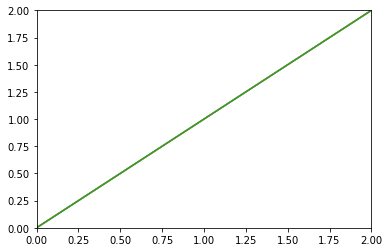

In [2]:
a1 = [0, 1, 2]
a2 = [0, 1, 2]

for i in range(3):
    plt.xlim(right=2) 
    plt.ylim(top=2)
    plt.plot(a1,a2,)

plt.show()

Investigamos otra libreria de graficos (pillow) que permitiría imprimir por pixel


In [3]:
 pip install Pillow

El procedimiendo de Pillow es crear un canvas que luego servira de lienzo para dibujar por encima (puntos, lineas, etc). El codigo a seguir muestra los pasos 1-2 para crear y guardar el canvas. Los pasos 3-4 sirven para el ploteo; asi, es importante notar que la libreria Pillow, en el paso 3, solamente abre la imagen. En el paso 4, haciendo uso de la libreria matplotlib.pyplot, se realiza el ploteo en si.


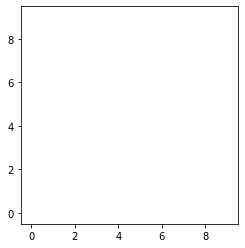

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

#1. dibujar canvas
blank_image = Image.new('RGB', (10, 10), 'white')
img_draw = ImageDraw.Draw(blank_image)

#2. guardar la imagen
blank_image.save('blank_image.jpg')

#3. abrir la imagen utilizando el nombre que ya esta en la ruta por defecto del Colab
img = Image.open('blank_image.jpg')

#4. Como plt sabe cómo manejar la instancia de la clase Image, simplemente ingrese su imagen cargada al método imshow
plt.imshow(img, origin="lower")


Algoritmo DDA

The slowest run took 5.44 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 25.2 µs per loop


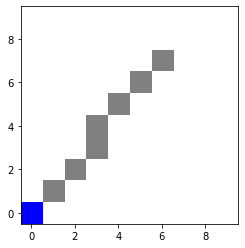

In [5]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

def ROUND(a):
	return int(a + 0.5)
 
def drawDDA(x1,y1,x2,y2,img_draw):
  #1. identificar los diferenciales (los pixeles que van a recorrer en cada eje)
  dx = (x2-x1)
  dy = (y2-y1)

  #2. determinar el largo de la linea
  length = dx if dx > dy else dy

  #3. calcular incrementos en x & y
  ix = dx/length
  iy = dy/length

  #4. asignar los puntos de inicio
  x,y = x1,y1

  #5. pintar el punto de inicio
  img_draw.point((ROUND(x),ROUND(y)),fill='blue')
  
  #6. aqui inicia el dibujo de los demás puntos de la linea hasta el final
  for i in range(length):
    x += ix
    y += iy
    img_draw.point((ROUND(x),ROUND(y)),fill='gray')

#aqui termina el algoritmo de DDA

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

#dibujar las lineas
%timeit drawDDA(0,0,6,7, img_draw)

#guardar la imagen
img.save('dda_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')




Si | m | < 1, la línea es más horizontal que vertical.
Según tiende a cero m, la línea tiende a ser horizontal.

Si | m | > 1, la línea es más vertical que horizontal.
Según tiende a infinito m, la línea tiende a ser vertical.

Compare el tiempo de ejecución en ambas situaciones y justifique porque uno demora más que el otro. Además, para ayudar en su respuesta, Grafique una linea completamente vertical. 


**Algoritmo** **Bresenham**

El algoritmo de Bresenham utiliza, a diferencia de DDA, requiere solo una suma de enteros y una prueba de signo para cada píxel generado; logrando asi menor tiempo de ejecucion y uso de memoria.
La prueba de signo sirve de control cuando la pendiente es mayor a 1.


m= 1.2
-1 -1
6
x,y 6 7
x,y 5 6 2
x,y 4 5 0
x,y 3 4 -2
x,y 3 3 8
x,y 2 2 6
x,y 1 1 4


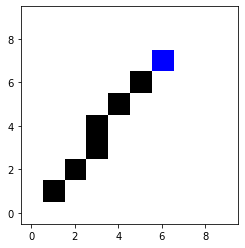

In [6]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image, ImageDraw

def drawBresenham(x1,y1,x2,y2,img_draw):
  #inicializar variable
  x = x1
  y = y1

  #calcular los diferenciales
  dx = abs(x2-x1)
  dy = abs(y2-y1)
  m= dy/dx
  print("m=",m)

  #bresenham maneja el artificio de los signos para dibujar en cualquier cuadrante
  Sx = np.sign(x2-x1) #5
  Sy = np.sign(y2-y1) #6 
  print(Sx,Sy)

  #el swap deacuerdo a la pendiente. Si es mayor a 1 entonces dy crece más, por tanto el swap 
  if (dy>dx): 
    t = dx
    dx = dy
    dy = t
    steps = dx #steps o largo de linea
    flag = 1
  else:
    steps = dx
    flag = 0
  
  print(steps)

  #el Pk viene a ser el valor de error o fault visto en otras versiones del algoritmo
  Pk = 2*dy - dx 



  # dibuja el punto inicial
  img_draw.point((x,y), fill='blue')
  print("x,y",x,y)
  # comienza a iterar a lo largo de la linea (definido por steps)
  for i in range(steps): # range va hasta antes de un numero especifico, por eso el +1
    while Pk >= 0: 
      if flag == 1:
        x += Sx   
      else:
        y += Sy
      Pk = Pk - 2*dx 


    if flag == 1:
      y += Sy
    else:
      x += Sx
   
    Pk += 2*dy 
    img_draw.point((x,y), fill='black')
    print("x,y",x,y,Pk)

#aqui termina bresenham

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

#dibujar las lineas
drawBresenham(6,7,1,1, img_draw)

#guardar la imagen
img.save('breh_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')

#referencia:  https://books.google.com.pe/books?id=WXzId7sBZiMC&pg=PA53&lpg=PA53&dq=dda+algorithm+ucertify&source=bl&ots=hLyKv0lzVd&sig=ACfU3U3DmckQs1wmMMY23OusjnwsPLAJTQ&hl=es&sa=X&ved=2ahUKEwidndWcuvrqAhUmnOAKHfCnD7YQ6AEwFnoECAsQAQ#v=snippet&q=bresenham&f=false

**Ejercicio en clase**: modificar el código para que pueda rasterizarse una linea con las siguientes coordenadas (0,0) y (4,7)

**Ejercicio propuesto:**
Realizar el algoritmo del Punto Medio 


0.25
1 1
2 8 0
8 8 2
0 0 -2.0
x,y 1 0 0.0
x,y 2 1 -6.0
x,y 3 1 -4.0
x,y 4 1 -2.0
x,y 5 1 0.0
x,y 6 2 -6.0
x,y 7 2 -4.0
x,y 8 2 -2.0


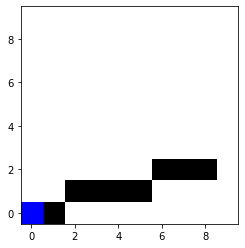

In [9]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image, ImageDraw

def drawMidPoint(x1,y1,x2,y2,img_draw):
  
  #calcular los diferenciales
  dx = abs(x2-x1)
  dy = abs(y2-y1)
  Sx = np.sign(x2-x1) #5
  Sy = np.sign(y2-y1) #6 
  m=dy/dx
  print (m)
  print(Sx,Sy)
  
  if (dy>dx):
      t=dx
      dx=dy
      dy=t
      a=dy
      b=-dx
      c=(y2*x1)-(y1*x2)
      steps=dx
      flag=1
      
  else:
      a=dy
      b=dx
      c=(x2*y1)-(x1*y2)
      steps=dx
      flag =0
  
  print(a,b,c)
  print(steps,dx,dy)
  x=round(x1)
  y=round(y1-(x-x1)*(a/b))
  
  if (Sx==1) and (Sy==1):
    if (m>1):
      d=Sy*a*(x+1)+Sx*b*(y+0.5)+c #2do 
    else:
      d=Sy*a*(x+1)-Sx*b*(y+0.5)+c #1er
  if (Sx==-1) and (Sy==1):
    if (m>1):
      d=-Sy*a*(x+1)+Sx*b*(y+0.5)+c-1 #3er
    else:
      d=Sy*a*(x+1)+Sx*b*(y+0.5)+c  #4to
  if (Sx==-1) and (Sy==-1):
    if (m>1):
      d=Sy*a*(x+1)+Sx*b*(y-0.5)+c-1 #6to
    else:
      d=Sy*a*(x+0.5)+Sx*b*(y+1)+c  #5to
  if (Sx==1) and (Sy==-1):
    if (m>1):
      d=-Sy*a*(x+1)+Sx*b*(y-0.5)-c  #7m0
    else:
      d=-Sy*a*(x+1)-Sx*b*(y+0.5)+c   #8vo
  print(x,y,d)
  img_draw.point((x,y),fill="blue")
  for i in range (steps):
    if (d>=0):
      d=d+dy-dx
      
      y+=Sy
      x+=Sx
    else:
      d=d+dy     
      if (flag==1):
        y+=Sy
      else:
        x+=Sx    
    print("x,y",x,y,d)
    img_draw.point((x,y),fill="black")


  
#aqui termina midpoint

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

#dibujar las lineas
#drawMidPoint(0,0,4,3, img_draw)
drawMidPoint(0,0,8,2, img_draw)
#drawMidPoint(6,0,0,7, img_draw)
#drawMidPoint(4,0,0,3, img_draw)
#drawMidPoint(4,3,0,0, img_draw)
#drawMidPoint(6,7,0,0, img_draw)
#drawMidPoint(0,7,6,0, img_draw)
#drawMidPoint(0,3,4,0, img_draw)
#guardar la imagen
img.save('midpoint_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')

#funciona: 1er,2do,3er,4to,5to,6to,7mo,8vo octante


# Curiosidades
"Mire, a Bresenham se le ocurrió una idea que resultó en un algoritmo real (= código) para dibujar líneas y círculos. El algoritmo final (= código / pseudocódigo) fue presentado primero por Bresenham y, por lo tanto, se llama algoritmo de Bresenham.

Más tarde, Pitteway adoptó un enfoque diferente (= idea matemática) que se puede aplicar a algo más que líneas y círculos. Sin embargo, cuando se usa con líneas (y círculos), el algoritmo resultante (= código) es exactamente el de Bresenham. No obstante, el algoritmo (código / pseudocódigo) a menudo se llama algoritmo de punto medio porque la "idea de punto medio" es más poderosa en general y por lo tanto "mejor" que la de Bresenham.

¡Los algoritmos de dibujo lineal resultantes (= código) son exactamente iguales! Lo que lo convierte en Bresenham o Midpoint es la idea que está detrás del algoritmo, cómo el algoritmo (= código) se dedujo originalmente (= idea), se explicó (= idea) a los estudiantes o cómo se demuestra su corrección." 

fuente:https://arstechnica.com/civis/viewtopic.php?t=554096

---
